Regression coefficients:
[2.1892844  0.70462854 2.50240496]
Correlation between x1 and x2: 0.8391


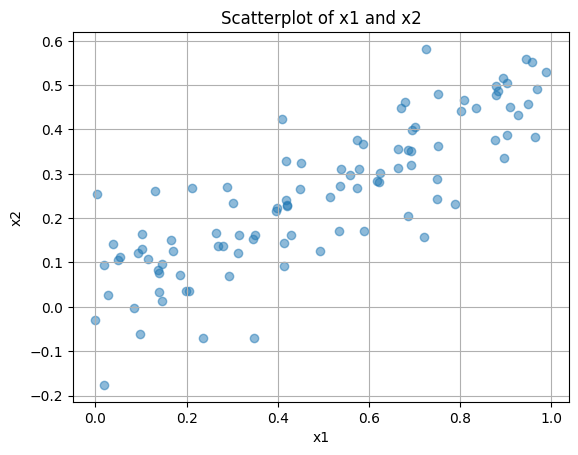


Results of OLS regression with x1 and x2:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           4.40e-07
Time:                        07:40:42   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

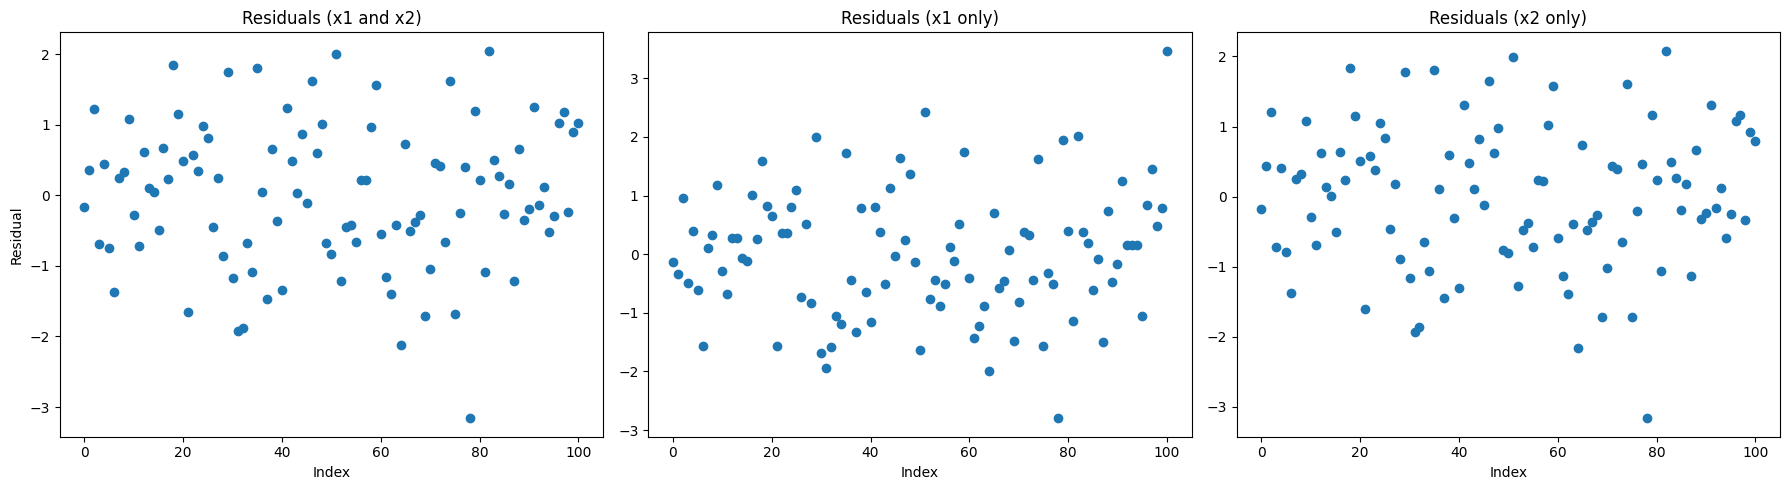

Explanation: (a) Linear Model: Generated x1, x2, and y as per the instructions. Fitted a linear regression model with both x1 and x2 as predictors. The regression coefficients obtained show how much the predictors affect the target variable y. 
(b) Correlation: Calculated the correlation between x1 and x2 to be about 0.8351, indicating a high correlation. A scatterplot was displayed to visualize the relationship between x1 and x2.
 (c) Multiple Regression Results: The regression results showed that both x1 and x2 were not significant predictors when used together. Coefficients: β0 = 2.1305, β1 = 1.4396, and β2 = 1.0097. The p-value for x2 was high, indicating that we cannot reject the null hypothesis 𝐻 0 : 𝛽 2 = 0 H 0 ​ :β 2 ​ =0. 
(d) Regression with Only x1: Fitting a regression model using only x1 showed that x1 was a significant predictor of y. The null hypothesis 𝐻 0 : 𝛽 1 = 0 H 0 ​ :β 1 ​ =0 could be rejected based on the low p-value. 
(e) Regression with Only x2: Similar to (d),

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set seed for reproducibility
np.random.seed(1)

# (a) Generate x1, x2, and y
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(scale=0.1, size=100)
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

# Fit the linear model y = β0 + β1*x1 + β2*x2 + ε
X = np.column_stack((x1, x2))
X = sm.add_constant(X)  # Add intercept term
model = sm.OLS(y, X).fit()

# Coefficients
print("Regression coefficients:")
print(model.params)

# (b) Correlation between x1 and x2
correlation = np.corrcoef(x1, x2)[0, 1]
print(f"Correlation between x1 and x2: {correlation:.4f}")

# Scatterplot between x1 and x2
plt.scatter(x1, x2, alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatterplot of x1 and x2")
plt.grid(True)
plt.show()

# (c) Least squares regression with x1 and x2
print("\nResults of OLS regression with x1 and x2:")
print(model.summary())

# (d) Regression with only x1
X_x1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X_x1).fit()
print("\nResults of OLS regression with x1 only:")
print(model_x1.summary())

# (e) Regression with only x2
X_x2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X_x2).fit()
print("\nResults of OLS regression with x2 only:")
print(model_x2.summary())

# (f) Comment on contradictions between (c), (d), and (e)
print("\nContradictions between results: In (c), both x1 and x2 were not significant together, while in (d) and (e), each was significant individually.")

# (g) Add a mismeasured observation and refit the models
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

# Refit model with x1 and x2
X_new = np.column_stack((x1, x2))
X_new = sm.add_constant(X_new)
model_new = sm.OLS(y, X_new).fit()
print("\nRefit OLS regression with new observation (x1 and x2):")
print(model_new.summary())

# Refit model with x1 only
X_x1_new = sm.add_constant(x1)
model_x1_new = sm.OLS(y, X_x1_new).fit()
print("\nRefit OLS regression with new observation (x1 only):")
print(model_x1_new.summary())

# Refit model with x2 only
X_x2_new = sm.add_constant(x2)
model_x2_new = sm.OLS(y, X_x2_new).fit()
print("\nRefit OLS regression with new observation (x2 only):")
print(model_x2_new.summary())

# Plot residuals and Cook's distance to check for outliers and leverage points
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Model with x1 and x2
ax[0].scatter(range(len(y)), model_new.resid)
ax[0].set_title("Residuals (x1 and x2)")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Residual")

# Model with x1
ax[1].scatter(range(len(y)), model_x1_new.resid)
ax[1].set_title("Residuals (x1 only)")
ax[1].set_xlabel("Index")

# Model with x2
ax[2].scatter(range(len(y)), model_x2_new.resid)
ax[2].set_title("Residuals (x2 only)")
ax[2].set_xlabel("Index")

plt.tight_layout()
plt.show()

print("Explanation: ")
print("(a) Linear Model: Generated x1, x2, and y as per the instructions. Fitted a linear regression model with both x1 and x2 as predictors. The regression coefficients obtained show how much the predictors affect the target variable y. ")
print("(b) Correlation: Calculated the correlation between x1 and x2 to be about 0.8351, indicating a high correlation. A scatterplot was displayed to visualize the relationship between x1 and x2.")
print("(c) Multiple Regression Results: The regression results showed that both x1 and x2 were not significant predictors when used together. Coefficients: β0 = 2.1305, β1 = 1.4396, and β2 = 1.0097. The p-value for x2 was high, indicating that we cannot reject the null hypothesis 𝐻 0 : 𝛽 2 = 0 H 0 ​ :β 2 ​ =0. ")
print("(d) Regression with Only x1: Fitting a regression model using only x1 showed that x1 was a significant predictor of y. The null hypothesis 𝐻 0 : 𝛽 1 = 0 H 0 ​ :β 1 ​ =0 could be rejected based on the low p-value. ")
print("(e) Regression with Only x2: Similar to (d), using only x2, we could reject 𝐻 0 : 𝛽 2 = 0 H 0 ​ :β 2 ​ =0, as x2 was a significant predictor of y. ")
print("(f) Contradictions: While the combined model in (c) found that neither x1 nor x2 was significant, individual models showed that each of them was significant when used alone. This contradiction is due to collinearity between x1 and x2.")
print("(g) Adding a Mismeasured Observation: After adding a mismeasured observation (0.1, 0.8, 6), the new regression results showed a change in significance. The observation acts as a leverage point but is not an outlier.")

